In [1]:
import json
from os.path import isfile

hypothesis_evidence_lst=[]
with open('../data/Training_data/train.json','r') as f:
    train_json=json.load(f)
    for k in train_json:
        line=train_json[k]
        if isfile('../data/Training_data/Clinical trial json/{}.json'.format(line['Primary_id'])):
            premises=json.load(open('../data/Training_data/Clinical trial json/{}.json'.format(line['Primary_id'])))
            hypothesis_evidence_lst.append([
                line['Statement'],
                json.dumps([premises[line['Section_id']][idx] for idx in line['Primary_evidence_index']]),
                line['Label']
            ])

In [2]:
len(hypothesis_evidence_lst)

1000

In [3]:
hypothesis_evidence_lst[:3]

[['Patients in NCT02953860 receive more mg of Enzalutamide than Fulvestrant over the course of the study.',
  '["  Fulvestrant with Enzalutamide: 500mg of Fulvestrant will be given IM on days 1, 15, 28, then every 4 weeks as per standard of care (SOC) and 160mg of Enzalutamide will be given PO daily. Patients will receive a tumor biopsy at the start of treatment and 4 weeks after the start of treatment, with an optional 3rd biopsy at the end treatment."]',
  'Entailment'],
 ['Patients in NCT02953860 receive less mg of Enzalutamide than Fulvestrant on a weekly basis.',
  '["  Fulvestrant with Enzalutamide: 500mg of Fulvestrant will be given IM on days 1, 15, 28, then every 4 weeks as per standard of care (SOC) and 160mg of Enzalutamide will be given PO daily. Patients will receive a tumor biopsy at the start of treatment and 4 weeks after the start of treatment, with an optional 3rd biopsy at the end treatment."]',
  'Contradiction'],
 ['Patients in NCT01830933 do not receive any extra 

In [4]:
import pandas as pd

hypothesis_evidence_df=pd.DataFrame(hypothesis_evidence_lst,columns=['hypothesis','evidences','label'])
hypothesis_evidence_df

,hypothesis,evidences,label
0,Patients in NCT02953860 receive more mg of Enz...,"["" Fulvestrant with Enzalutamide: 500mg of Fu...",Entailment
1,Patients in NCT02953860 receive less mg of Enz...,"["" Fulvestrant with Enzalutamide: 500mg of Fu...",Contradiction
2,Patients in NCT01830933 do not receive any ext...,"[""INTERVENTION 1: "", "" Usual Care"", "" Usual ...",Entailment
3,Patients in NCT01830933 and NCT01224678 are ad...,"[""INTERVENTION 1: "", "" Usual Care"", "" Usual ...",Contradiction
4,Intervention 2 of NCT01224678 resulted in a lo...,"[""Outcome Measurement: "", "" Percent Change (B...",Entailment
...,...,...,...
995,participants from both cohorts of NCT00706030 ...,"[""Outcome Measurement: "", "" Overall Response ...",Contradiction
996,Most patients in the Letrozole group of NCT001...,"[""Outcome Measurement: "", "" Percent Change Fr...",Entailment
997,All patients in the Letrozole group of NCT0017...,"[""Outcome Measurement: "", "" Percent Change Fr...",Contradiction
998,the percentage of participants achieving compl...,"[""Outcome Measurement: "", "" CNS Objective Res...",Entailment


<AxesSubplot:xlabel='label', ylabel='Count'>

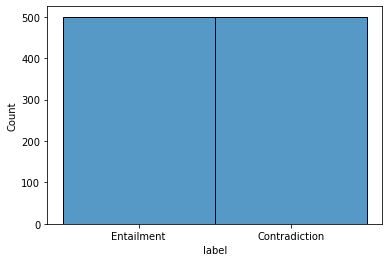

In [7]:
import seaborn as sns

sns.histplot(data=hypothesis_evidence_df, x="label")

<AxesSubplot:>

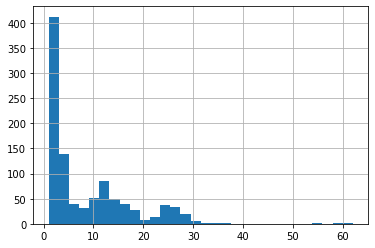

In [12]:
hypothesis_evidence_df.evidences.apply(lambda l:len(json.loads(l))).hist(bins=30)

<AxesSubplot:>

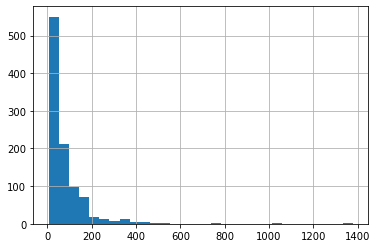

In [13]:
hypothesis_evidence_df.evidences.apply(lambda l:len(' '.join(json.loads(l)).split(' '))).hist(bins=30)

In [14]:
hypothesis_evidence_df.to_csv('./output/hypothesis_evidences.csv',index=False)

In [15]:
from sklearn.model_selection import train_test_split

train_df,test_df=train_test_split(hypothesis_evidence_df,test_size=0.2)
train_df,dev_df=train_test_split(train_df,test_size=0.1)

In [16]:
len(train_df),len(dev_df),len(test_df)

(720, 80, 200)

<AxesSubplot:xlabel='label', ylabel='Count'>

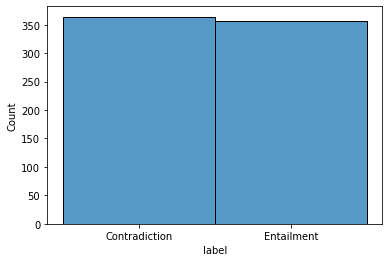

In [17]:
sns.histplot(data=train_df, x="label")

<AxesSubplot:xlabel='label', ylabel='Count'>

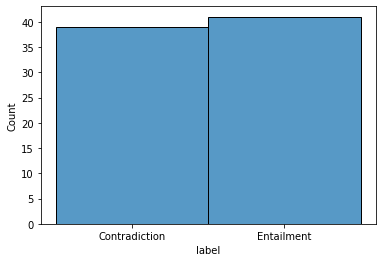

In [18]:
sns.histplot(data=dev_df, x="label")

<AxesSubplot:xlabel='label', ylabel='Count'>

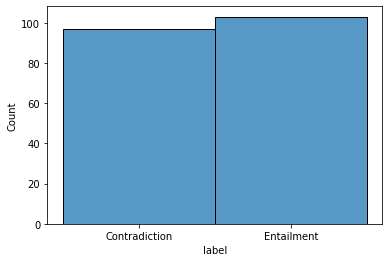

In [19]:
sns.histplot(data=test_df, x="label")

In [20]:
train_df.to_csv('./output/train_hypothesis_evidences.csv',index=False)

In [21]:
dev_df.to_csv('./output/dev_hypothesis_evidences.csv',index=False)

In [22]:
test_df.to_csv('./output/test_hypothesis_evidences.csv',index=False)